## Question 1 - Occupations

#### 1.1  Import the necessary libraries

In [57]:
import pandas as pd

#### 1.2  Import the dataset from this address
#### 1.3 Assign it to a variable called users

In [8]:
users = pd.read_csv('u.user', sep= '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 1.4. Discover what is the mean age per occupation

In [109]:
users['age'].mean()

34.05196182396607

#### 1.4.  Discover the Male ratio per occupation and sort it from the most to the least

In [31]:
mRatio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = mRatio[['F', 'M']].sum(axis=1)
mRatio['MaleRatio'] = 100 * mRatio['M'] / total

mRatio = mRatio['MaleRatio'].sort_values(ascending=False)
# result
mRatio

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: MaleRatio, dtype: float64

#### 1.5 For each occupation, calculate the minimum and maximum ages

In [32]:
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### 1.6 For each combination of occupation and sex, calculate the mean age

In [37]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

 #### 1.7 For each occupation present the percentage of women and men

In [81]:
dfGenderOccupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupationCount = users.groupby(['occupation']).agg('count')
occupationCount
genderPercentage = dfGenderOccupation.div(occupationCount, level = "occupation") * 100
genderPercentage.loc[:,'gender']


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Question 2 - Euro Teams

 #### 2.1 Import the necessary libraries

In [56]:
import pandas as pd

####  2. 2 Import the dataset from this address
####  2.3 Assign it to a variable called euro12

In [96]:
euro12 = pd.read_csv('euro2012.csv')

#### 2.4  Select only the Goal column

In [104]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### 2.5. How many team participated in the Euro2012?


In [98]:
teamsCount = len(euro12)
teamsCount

16

#### 2.6  What is the number of columns in the dataset?

In [100]:
columnCount = len(euro12.columns)
columnCount

35

#### 2.7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [101]:
discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [95]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### 2.9 Calculate the mean Yellow Cards given per Team

In [107]:
discipline['Yellow Cards'].mean()

7.4375

#### 2.10. Filter teams that scored more than 6 goals

In [114]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


####  2.11. Select the teams that start with G

In [117]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### 2.12 Select the first 7 columns

In [122]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Select all columns except the last 3

In [123]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


 #### 2.14 Present only the Shooting Accuracy from England, Italy and Russia

In [157]:
threeCountries = euro12[euro12.Team.isin(['England','Italy','Russia'])]
threeCountries[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3 - Housing

#### 3.1 Import the necessary libraries

In [160]:
import numpy as np
import pandas as pd

#### 3.2. Create 3 differents Series, each of length 100, as follows:

In [201]:
firstNumber = pd.Series(np.random.randint(1, high=5, size=100))
secondNumber = pd.Series(np.random.randint(1, high=4, size=100))
thirdNumber = pd.Series(np.random.randint(10000, high=30001, size=100))
print (firstNumber, secondNumber, thirdNumber)

0     4
1     3
2     3
3     1
4     4
     ..
95    4
96    3
97    4
98    1
99    1
Length: 100, dtype: int32 0     3
1     2
2     1
3     3
4     1
     ..
95    3
96    1
97    3
98    3
99    1
Length: 100, dtype: int32 0     26823
1     21170
2     25503
3     11589
4     18601
      ...  
95    13714
96    11980
97    16102
98    18510
99    14886
Length: 100, dtype: int32


#### 3.3. Create a DataFrame by joinning the Series by column

In [203]:
df = pd.concat([firstNumber, secondNumber, thirdNumber], axis=1)
df

,0,1,2
0,4,3,26823
1,3,2,21170
2,3,1,25503
3,1,3,11589
4,4,1,18601
...,...,...,...
95,4,3,13714
96,3,1,11980
97,4,3,16102
98,1,3,18510


#### 3.4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [204]:
df.columns=['beds', 'bathrs', 'price_sqr_meter']
df

,beds,bathrs,price_sqr_meter
0,4,3,26823
1,3,2,21170
2,3,1,25503
3,1,3,11589
4,4,1,18601
...,...,...,...
95,4,3,13714
96,3,1,11980
97,4,3,16102
98,1,3,18510


#### 3.5 Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [209]:
df_new = df['beds'].append(df['bathrs'].append(df['price_sqr_meter']))
df_new

0         4
1         3
2         3
3         1
4         4
      ...  
95    13714
96    11980
97    16102
98    18510
99    14886
Length: 300, dtype: int32

#### 3.6 Ops it seems it is going only until index 99. Is it true?

Yes

#### 3.7. Reindex the DataFrame so it goes from 0 to 299

In [218]:
df_new.reset_index(drop=True)


0          4
1          3
2          3
3          1
4          4
       ...  
295    13714
296    11980
297    16102
298    18510
299    14886
Length: 300, dtype: int32

### Question 4 - Wind Statistics 

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute 

#### 4.1. Import the necessary libraries

In [498]:
import pandas as pd
import numpy as np

#### 4.2. Import the dataset from this address 
#### 4.3. Assign it to a variable called data 

In [499]:
data = pd.read_csv('wind.data',delim_whitespace=True)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#### 4.3. Replace the first 3 columns by a proper datetime index. 
#### 4.3.  4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
#### 4.5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [500]:
data["Date"]= pd.to_datetime(data[['Yr', 'Mo', 'Dy']]
               .rename(columns={'Yr': 'year',
                                'Mo': 'month',
                                'Dy': 'day'})
               .assign(year=lambda x: x['year']+1900))
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


#### 4.5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [501]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


#### 4.6 Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [502]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### 4.7 Compute how many non-missing values there are in total.

In [503]:
data = data.dropna()
data.notna().sum().sum()

78552

In [504]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


#### 4.8 Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [505]:
data['average'] = data.iloc[:, :12].astype(float).mean(axis=1)
avgWindSpeed = data['average'].mean()
avgWindSpeed

C:\Users\prav3\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10.222465245951703

#### 4.9 Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [527]:
loc_stats = pd.DataFrame()
 
loc_stats['min'] = data.min()
loc_stats['max'] = data.max() 
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
 
loc_stats

,min,max,mean,std
RPT,0.67,35.8,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.5,33.84,11.656396,5.007805
KIL,0,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0,26.16,7.085066,3.967735
DUB,0,30.37,9.793006,4.978030
CLA,0,31.08,8.486601,4.498299
MUL,0,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


#### 4.10  Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [507]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats


,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.061972
1961-01-05,6.17,13.33,10.630000,2.341250
1961-01-06,4.42,13.21,8.240000,2.870427
1961-01-07,4.96,14.29,10.385000,2.941325
1961-01-08,5.91,16.62,10.487500,3.396221
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.533109
1978-12-28,5.00,41.46,15.150000,9.275416
1978-12-29,8.71,29.58,14.890000,5.511751


#### 4.11 Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [515]:
data['date'] = data.index
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)
 
january = data.query('month == 1')
january.loc[:,'RPT':"MAL"].mean()


C:\Users\prav3\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prav3\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prav3\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

#### 4.12. Downsample the record to a yearly frequency for each location.

In [540]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,average,date,month,year,day
Date,,,,,,,,,,,,,,,,,
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,5.510833,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,16.538333,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,19.094167,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,8.854167,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,19.804167,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,7.889167,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,19.620000,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,5.459167,1969-01-01,1,1969,1
1970-01-01,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00,6.879167,1970-01-01,1,1970,1


#### 4.13. Downsample the record to a weekly frequency for each location.

In [541]:
data.query('day == 7')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,average,date,month,year,day
Date,,,,,,,,,,,,,,,,,
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,10.385000,1961-01-07,1,1961,7
1961-02-07,18.05,14.37,14.88,9.75,10.96,11.17,14.21,9.71,13.04,12.25,15.21,17.58,13.431667,1961-02-07,2,1961,7
1961-03-07,6.46,10.50,8.00,5.41,10.58,6.58,3.63,6.67,7.08,7.04,16.08,8.75,8.065000,1961-03-07,3,1961,7
1961-04-07,8.21,7.04,13.75,3.75,6.00,5.00,5.33,4.00,5.66,3.67,7.62,7.21,6.436667,1961-04-07,4,1961,7
1961-05-07,18.16,17.71,14.88,14.46,23.16,15.46,18.21,18.05,17.04,15.96,26.63,26.58,18.858333,1961-05-07,5,1961,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-07,13.04,9.87,8.29,4.46,7.17,5.54,5.96,5.41,6.71,5.54,9.83,14.54,8.030000,1978-08-07,8,1978,7
1978-09-07,9.79,9.29,7.83,5.25,10.21,11.12,9.21,9.46,9.79,7.08,15.41,15.34,9.981667,1978-09-07,9,1978,7
1978-10-07,15.09,21.00,14.33,7.92,15.79,10.83,9.04,10.46,13.33,10.34,18.41,20.71,13.937500,1978-10-07,10,1978,7


#### 4.13. Downsample the record to a daily frequency for each location.

In [517]:
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,average,date,month,year,day
Date,,,,,,,,,,,,,,,,,
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,8.875833,1961-02-01,2,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,8.779167,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,12.663333,1961-05-01,5,1961,1
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12,10.368333,1961-06-01,6,1961,1
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71,6.795833,1961-07-01,7,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,13.440000,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,7.229167,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,7.480833,1978-10-01,10,1978,1


#### 4.13. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [544]:
weekly = pd.DataFrame()

weekly['min'] = data.first("365 D").query('day == 7').min(axis=1)
weekly['max'] = data.first("365 D").query('day == 7').max(axis=1)
weekly['mean'] = data.first("365 D").query('day == 7').mean(axis=1)
weekly['std'] = data.first("365 D").query('day == 7').std(axis=1)

weekly

,min,max,mean,std
Date,,,,
1961-01-07,1.00,1961.0,131.500313,487.879734
1961-02-07,2.00,1961.0,134.038229,487.205969
1961-03-07,3.00,1961.0,129.740312,488.345249
1961-04-07,3.67,1961.0,128.479792,488.678188
1961-05-07,5.00,1961.0,138.634896,485.997528
1961-06-07,6.00,1961.0,131.863594,487.777237
1961-08-07,2.88,1961.0,127.611927,488.907170
1961-09-07,3.92,1961.0,129.231719,488.474486
1961-10-07,3.25,1961.0,130.619271,488.112349


### Question 5

#### 5.1 Import the necessary libraries

In [643]:
import pandas as pd
import numpy as np

#### 5.2 Import the dataset from this address. 
#### 5.3 Assign it to a variable called chipo.

In [644]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### 5.4. See the first 10 entries

In [645]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


 #### 5.5. What is the number of observations in the dataset?

In [646]:
chipo.shape[0]

4622

 #### 5.6. What is the number of columns in the dataset?

In [631]:
chipo.shape[1]

5

#### Print the name of all the columns.

In [632]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### 5.8 How is the dataset indexed?

In [633]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 5.9 Which was the most-ordered item?

In [634]:
mostOrderedItems = chipo[['item_name','quantity']].groupby(['item_name']).agg({'quantity':sum})
mostOrderedItems.sort_values(['quantity'],ascending=False,inplace=True)
mostOrderedItems

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


#### 5.10 For the most-ordered item, how many items were ordered?

In [635]:
chipo['item_name'].nunique()

50

#### 5.11 What was the most ordered item in the choice_description column?

In [647]:
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                         134
[Coke]                                                                                                              123
[Sprite]                                                                                                             77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                               42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                    40
                                                                                                                   ... 
[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Cheese, Lettuce]]                                             1
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Cheese, Sour Cream, Lettuce]]      1
[Roasted Chili Corn Salsa, [Black Beans,

#### 5.12 How many items were orderd in total?

In [648]:
chipo['quantity'].sum()

4972

#### 5.13.a Turn the item price into a float

In [638]:
chipo['item_price'] = chipo['item_price'].str.replace(" ","")
chipo['item_price'] = chipo['item_price'].str.replace("$","")
chipo.item_price = chipo.item_price.astype(float)

#### 5.13.b Check the item price type

In [654]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

#### Create a lambda function and change the type of item price
#### Check the item price type

In [650]:
dollarizer = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)

In [653]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

#### 5.14. How much was the revenue for the period in the dataset?

In [655]:
chipo['sub_total'] = round(chipo['item_price'] * chipo['quantity'],2)
chipo['sub_total'].sum()

39237.02

#### 5.15 How many orders were made in the period?

In [656]:
chipo['order_id'].nunique()

1834

#### 5.16 What is the average revenue amount per order?

In [658]:
chipo[['order_id','sub_total']].groupby(by=['order_id']).agg({'sub_total':'sum'})['sub_total'].mean()

21.394231188658654

#### 5.17 How many different items are sold?

In [659]:
chipo['item_name'].nunique()

50

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [666]:
import pandas as pd
import matplotlib.pyplot as plt

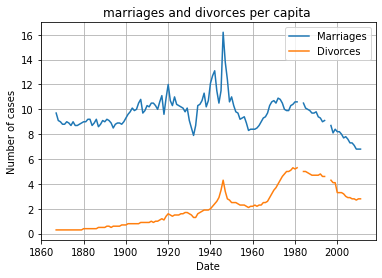

In [694]:
us_marriage_divorce_data = pd.read_csv('marriage.csv')

plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Marriages_per_1000'], label='Marriages')
plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Divorces_per_1000'], label='Divorces')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('marriages and divorces per capita ')
plt.grid(True)
plt.legend()

### Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

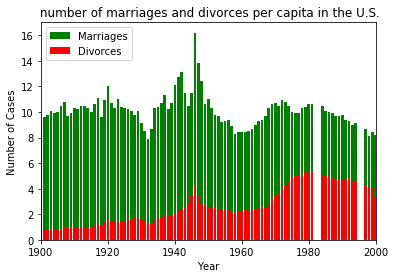

In [712]:

plt.bar(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Marriages_per_1000'],  color='green', label='Marriages')
plt.bar(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Divorces_per_1000'],  color='red', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title(' number of marriages and divorces per capita in the U.S.')
plt.legend()
plt.gca().set_xbound(1900, 2000)  #changes the range of the x-axis

plt.show()


### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


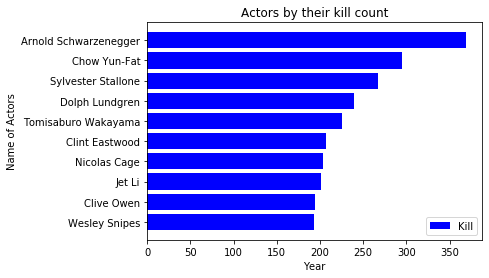

In [729]:
actor_data = pd.read_csv('actor.csv')
actor_data = actor_data.sort_values(by="Count")


plt.barh(actor_data['Actor'], actor_data['Count'],  color='blue', label='Kill')
plt.xlabel('Year')
plt.ylabel('Name of Actors')
plt.title('Actors by their kill count')
plt.legend()
plt.show()


### Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

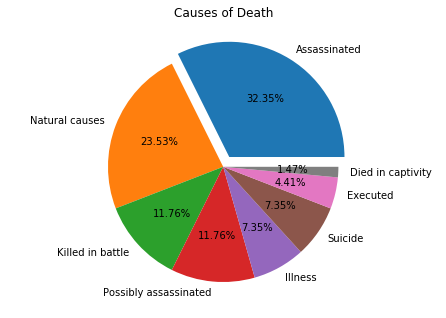

In [799]:
roman_data = pd.read_csv('romans.csv')

new_data = roman_data.groupby(['Cause_of_Death']).Cause_of_Death.agg('count').to_frame('Count').reset_index()
new_data = new_data.sort_values(by='Count', ascending=False)
labels = new_data['Cause_of_Death'].unique()


counts = roman_data['Cause_of_Death'].value_counts()
l = list(counts)
fig = plt.figure()
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Causes of Death')
ax.pie(l, labels = labels,explode = explode, autopct='%1.2f%%')
plt.show()

### Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

Text(0.5, 1.0, 'Relationship between the total revenue and the number of PhDs awarded in the U.S.')

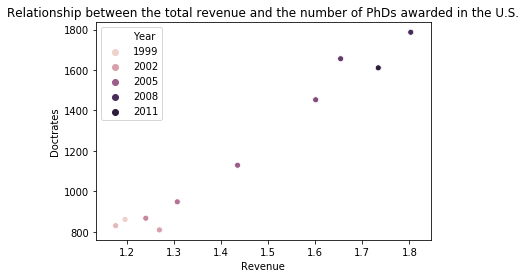

In [834]:
import seaborn as sb
earnings = pd.read_csv('earnings.csv')
earnings = earnings.rename(columns={'Total Arcade Revenue (billions)': 'Revenue', 'Computer Science Doctorates Awarded (US)': 'Doctrates'})

ax = sb.scatterplot(x='Revenue', y='Doctrates', hue="Year", data=earnings)
ax.set_title('Relationship between the total revenue and the number of PhDs awarded in the U.S.')